# Single dataset description

Text(0, 0.5, '# of people')

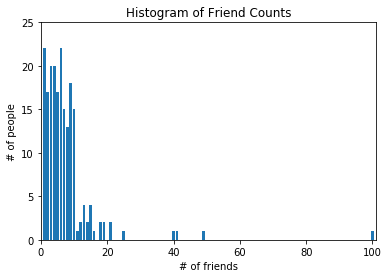

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")

In [38]:
num_points = len(num_friends)               # 204

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

# Measures of location

In [39]:
def mean(s):
    return sum(s) / len(s)

mean(num_friends)                           # 7.333333

7.333333333333333

In [40]:
def median(v):
    # finds the 'middle-most' value of v
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
    
median(num_friends)                          # 6.0

6.0

In [41]:
def quantile(x, p):
    # returns the pth-percentile value in x
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.10)
quantile(num_friends, 0.25)
quantile(num_friends, 0.75)
quantile(num_friends, 0.90)

13

In [42]:
def mode(x):
    # returns a list, since there might be more than one mode
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[6, 1]

# Indicators of variation

In [43]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [44]:
def de_mean(x):
    # translate x by subtracting its mean (so the result has mean 0)
    x_bar = mean(x)
    return [x - x_bar for x in xs]

de_mean(num_friends)

[-7.333333333333333,
 -6.333333333333333,
 -5.333333333333333,
 -4.333333333333333,
 -3.333333333333333,
 -2.333333333333333,
 -1.333333333333333,
 -0.33333333333333304,
 0.666666666666667,
 1.666666666666667,
 2.666666666666667,
 3.666666666666667,
 4.666666666666667,
 5.666666666666667,
 6.666666666666667,
 7.666666666666667,
 8.666666666666668,
 9.666666666666668,
 10.666666666666668,
 11.666666666666668,
 12.666666666666668,
 13.666666666666668,
 14.666666666666668,
 15.666666666666668,
 16.666666666666668,
 17.666666666666668,
 18.666666666666668,
 19.666666666666668,
 20.666666666666668,
 21.666666666666668,
 22.666666666666668,
 23.666666666666668,
 24.666666666666668,
 25.666666666666668,
 26.666666666666668,
 27.666666666666668,
 28.666666666666668,
 29.666666666666668,
 30.666666666666668,
 31.666666666666668,
 32.666666666666664,
 33.666666666666664,
 34.666666666666664,
 35.666666666666664,
 36.666666666666664,
 37.666666666666664,
 38.666666666666664,
 39.666666666666664,


In [45]:
def sum_of_squares(x):
    return sum(x * x for x in x)
    
sum_of_squares(num_friends)

27524

In [46]:
def variance(x):
    # almost the average squared deviation from the mean
    # variance requires at least two elements
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

1328.6447728516696

In [47]:
def standard_deviation(x):
    # the standard deviation is the square root of the variance
    return math.sqrt(variance(x))

standard_deviation(num_friends)

36.45057986989603

In [48]:
def interquartile_range(x):
    # returns the difference between the 75%-ile and the 25%-ile
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(num_friends)

50

# Correlation

Text(0, 0.5, 'daily minutes spent on the site')

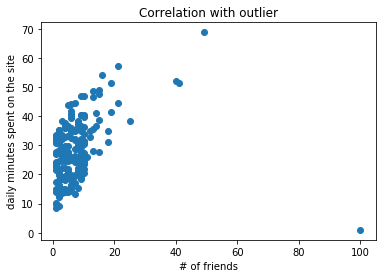

In [56]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

plt.scatter(num_friends, daily_minutes)

plt.title("Correlation with outlier")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")

In [ ]:
def dot(v, w):
    # computes v_1 * w_1 + ... + v_n * w_n
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(x, y):
    len(x) == len(y) # x and y must have same number of elements
    return dot(de_mean(x), de_mean(y)) / (len(x) - 1)

covariance(num_friends, daily_minutes)

In [51]:
def correlation(x, y):
    # measures how much x and y vary in tandem about their means
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero
    
correlation(num_friends, daily_minutes)

0.9401554105618496

In [52]:
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.9373733073703848

Text(0, 0.5, 'daily minutes spent on the site')

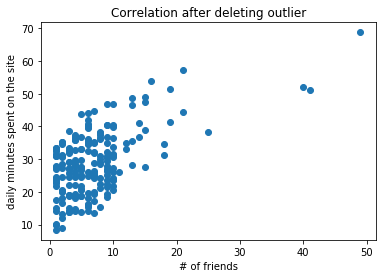

In [59]:
plt.scatter(num_friends_good, daily_minutes_good)

plt.title("Correlation after deleting outlier")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")

We deleted one outlier: a person who has 100 friends but he spends only one minute on the site yet.
After analyzing two scatter plots (before deleting this outlier and after deleting) we can see that without outlier the correlation between the number of friends and the time spent on the site is stronger.